In [1]:
import numpy as np
import math as math
import cmath as cmath
import psutil as psutil
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from matplotlib import gridspec as gridspec
import argparse as argparse
import operator as operator
import warnings as warnings
import copy as copy
import time as time
import pdb
import os as os
import random
import k2
import libcarma as libcarma
import util.mcmcviz as mcmcviz
import s82
from util.mpl_settings import set_plot_params
import util.triangle as triangle
import cPickle as pickle
%matplotlib inline

/Users/Jackster/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


kali is not setup. Setup kali by sourcing bin/setup.sh


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


In [3]:
#for plotting 
import seaborn as sns
sns.set_palette("colorblind")
sns.set_style("whitegrid")

In [3]:
filePathVan = "/Users/Jackster/Desktop/k2c08AGN/Vanderberg/" 
filePathKT = "/Users/Jackster/Desktop/k2c08AGN/KTeam/" 


In [12]:
sdsslc_r = s82.sdssLC(name = '005232.43+005123.0', band = 'r')
sdsslc_g = s82.sdssLC(name = '005232.43+005123.0', band = 'g')

In [4]:
LC = k2.k2LC(name = '206534218', band = 'Kep', processing = 'k2sff', campaign = 'c03')
everestLC = k2.k2LC(name = '206534218', band = 'Kep', processing = 'everest', campaign = 'c03')


In [8]:
LC2 = k2.k2LC(name = '206393665', band = 'Kep', processing = 'k2sff', campaign = 'c03')

In [5]:
def carmaFit(LC, pMax):    
    LC.minTimescale = 2.0
    LC.maxTimescale = 0.5
    LC.maxSigma = 2.0
    pMax = 2
    pMin = 1
    qMin = 1
    nwalkers = 200
    nsteps = 2000
    taskDict = dict()
    DICDict= dict()

    dataForResultsFile = [] 
    for p in xrange(pMin, pMax + 1):
        for q in xrange(qMin, p):
            nt = libcarma.basicTask(p, q, nwalkers, nsteps)

            print 'Starting libcarma fitting for p = %d and q = %d...'%(p, q)
            startLCARMA = time.time()
            nt.fit(LC)
            stopLCARMA = time.time()
            timeLCARMA = stopLCARMA - startLCARMA
            print 'libcarma took %4.3f s = %4.3f min = %4.3f hrs'%(timeLCARMA, timeLCARMA/60.0, timeLCARMA/3600.0)

            Deviances = copy.copy(nt.LnPosterior[:,nsteps/2:]).reshape((-1))
            DIC = 0.5*math.pow(np.std(-2.0*Deviances),2.0) + np.mean(-2.0*Deviances)
            print 'C-ARMA(%d,%d) DIC: %+4.3e'%(p, q, DIC)
            DICDict['%d %d'%(p, q)] = DIC
            taskDict['%d %d'%(p, q)] = nt
            sortedDICVals = sorted(DICDict.items(), key = operator.itemgetter(1))
            pBest = int(sortedDICVals[0][0].split()[0])
            qBest = int(sortedDICVals[0][0].split()[1])

    return nt

In [9]:
k2nt = carmaFit(LC2,3)

Starting libcarma fitting for p = 2 and q = 1...
libcarma took 45.094 s = 0.752 min = 0.013 hrs
C-ARMA(2,1) DIC: +nan


NameError: name 'DIC' is not defined

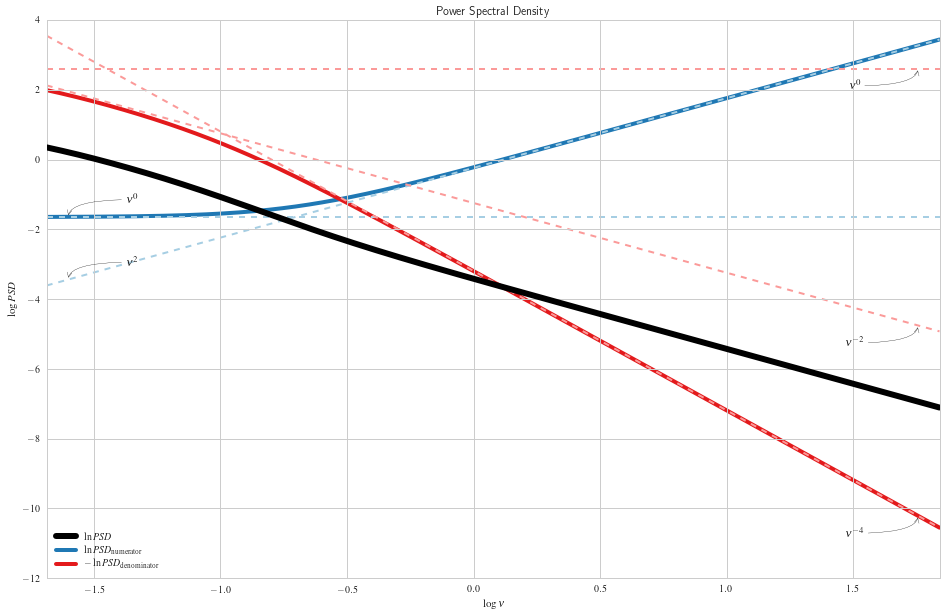

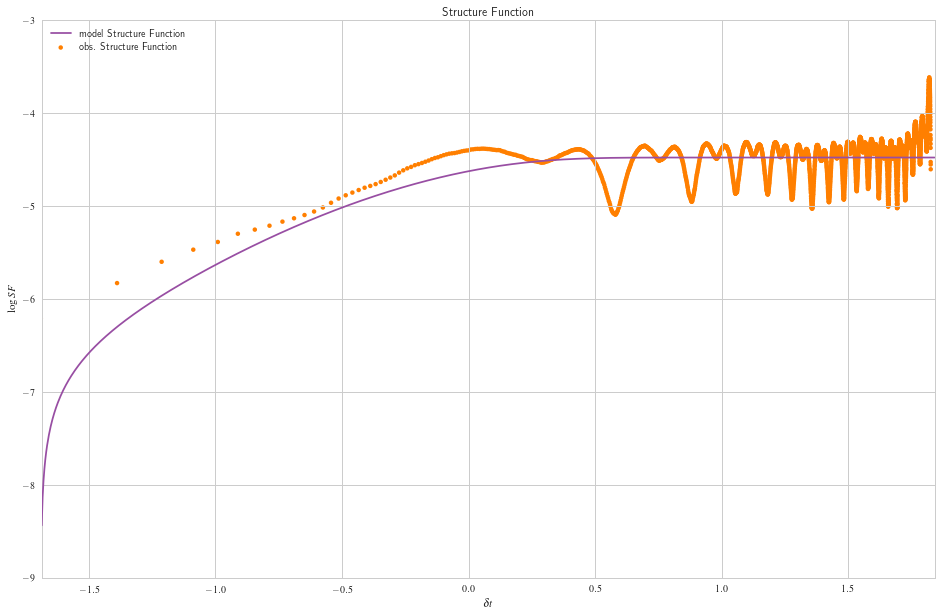

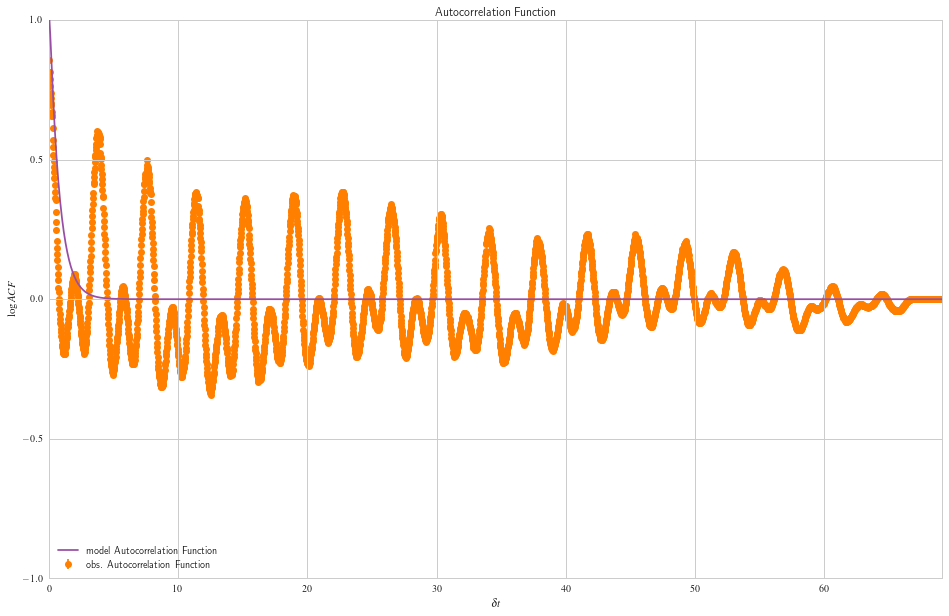

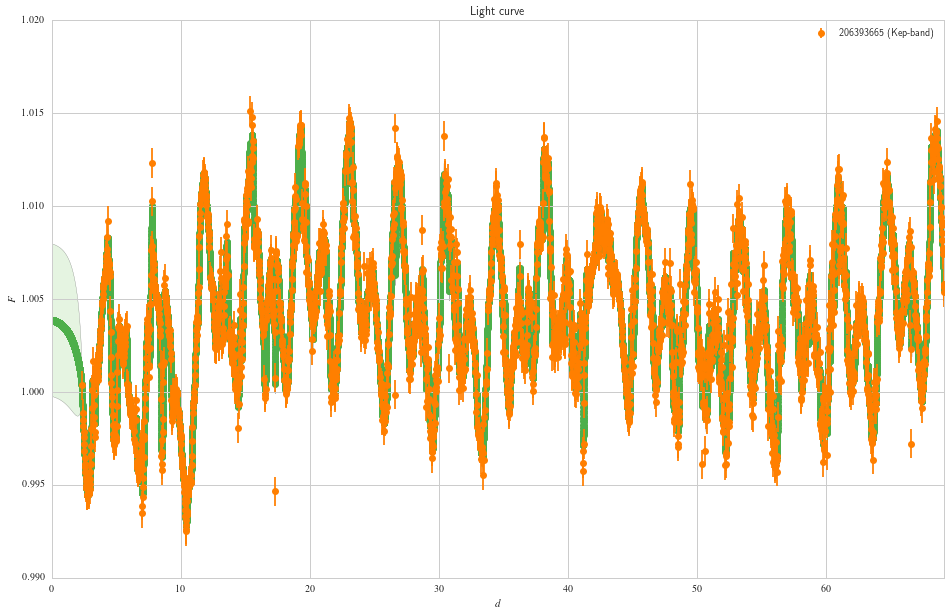

In [10]:
k2nt.smooth(LC2)
A = LC2.plot()
A.savefig('Camp3example2.png')
b = k2nt.plotacf(LC = LC2)
b.savefig('Camp3example2' + '_acf.png')
PSDplot = k2nt.plotpsd(LC = LC2, doShow = False)
PSDplot.savefig('Camp3example2'+'_PSD.png')
d = k2nt.plotsf(LC = LC2)
d.savefig('Camp3example2'+'_sf.png')

In [6]:
k2c3nt = carmaFit(LC,3)

Starting libcarma fitting for p = 2 and q = 1...
libcarma took 47.003 s = 0.783 min = 0.013 hrs
C-ARMA(2,1) DIC: +nan


/Users/Jackster/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Jackster/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


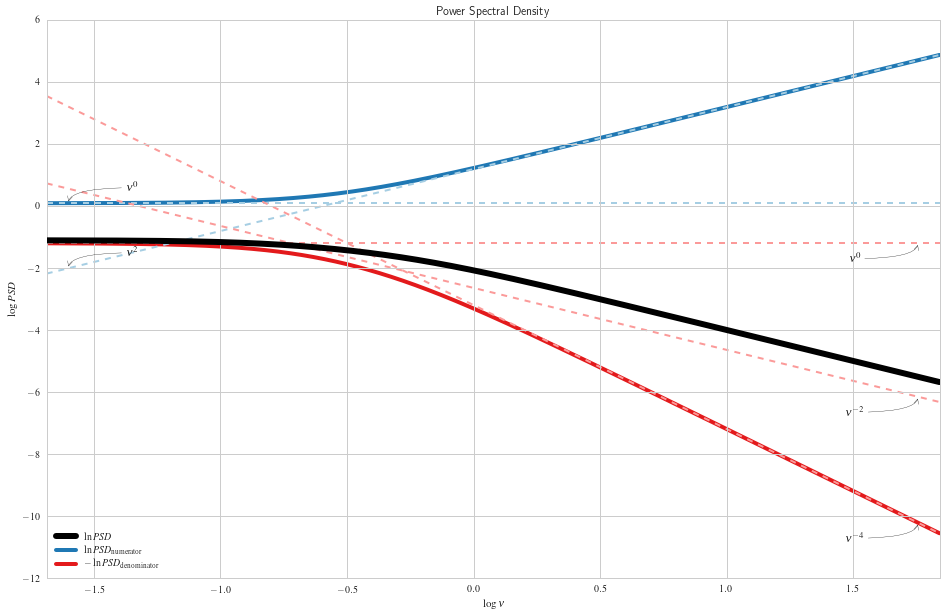

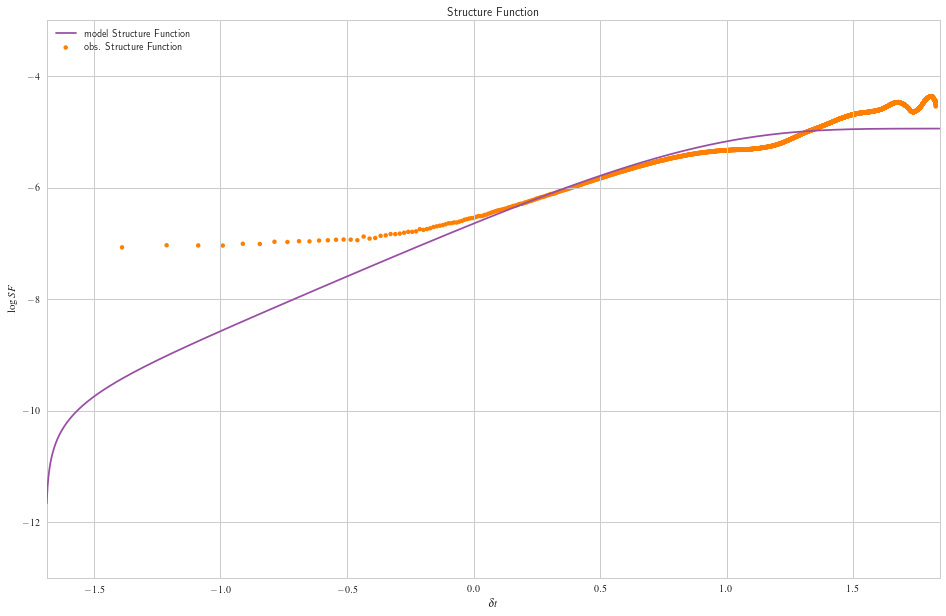

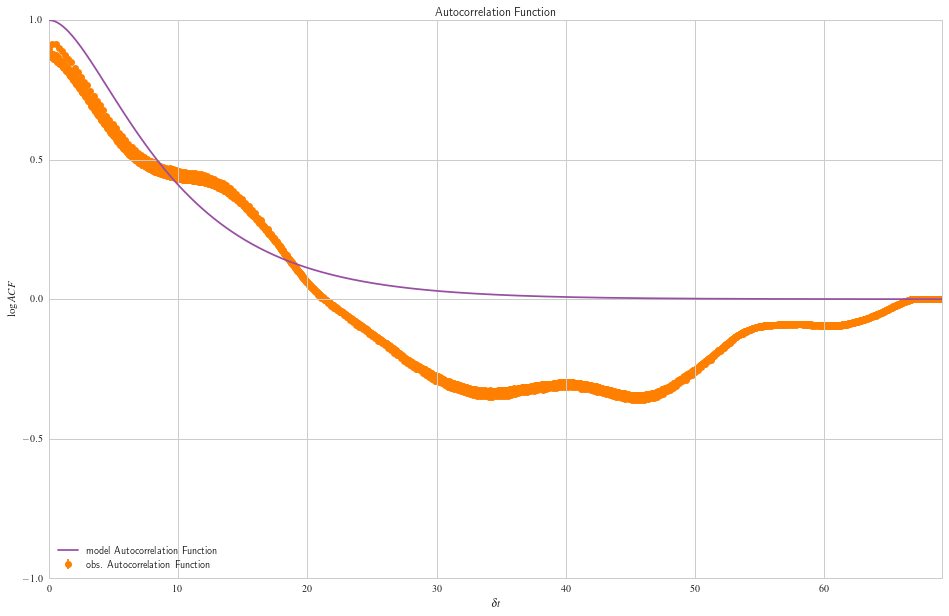

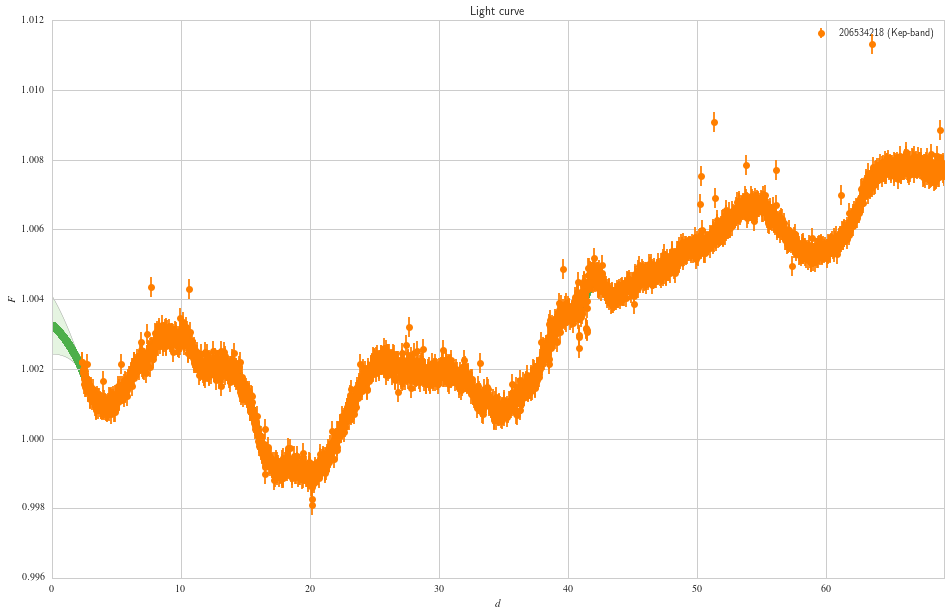

In [7]:
k2c3nt.smooth(LC)
A = LC.plot()
A.savefig('Camp3example.png')
b = k2c3nt.plotacf(LC = LC)
b.savefig('Camp3example' + '_acf.png')
PSDplot = k2c3nt.plotpsd(LC = LC, doShow = False)
PSDplot.savefig('Camp3example'+'_PSD.png')
d = k2c3nt.plotsf(LC = LC)
d.savefig('Camp3example'+'_sf.png')

In [15]:
ntg = carmaFit(sdsslc_g,2)
ntr = carmaFit(sdsslc_r,2)

Starting libcarma fitting for p = 2 and q = 1...
libcarma took 3.685 s = 0.061 min = 0.001 hrs
C-ARMA(2,1) DIC: +nan
Starting libcarma fitting for p = 2 and q = 1...
libcarma took 3.965 s = 0.066 min = 0.001 hrs
C-ARMA(2,1) DIC: +nan


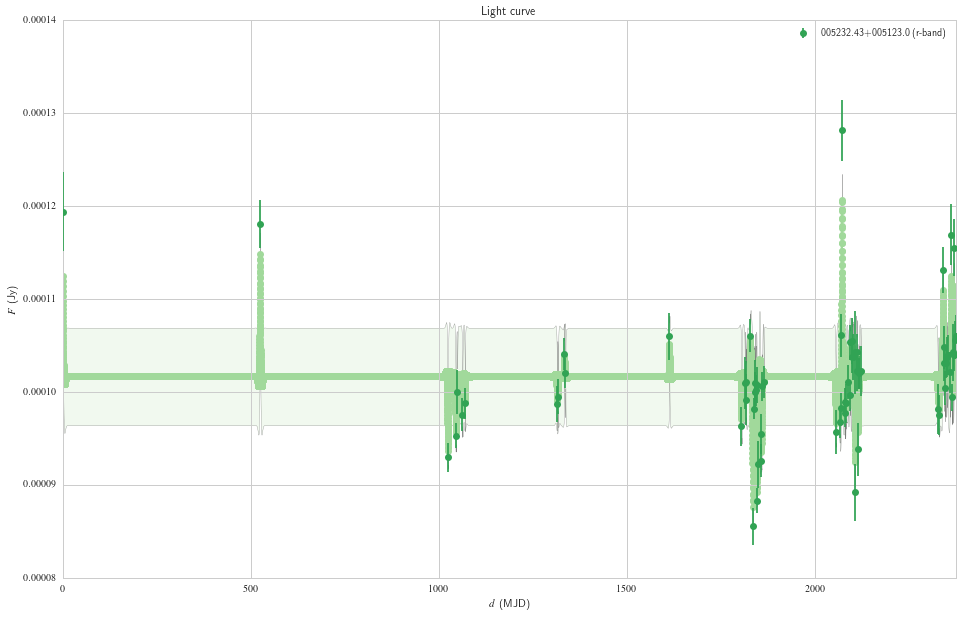

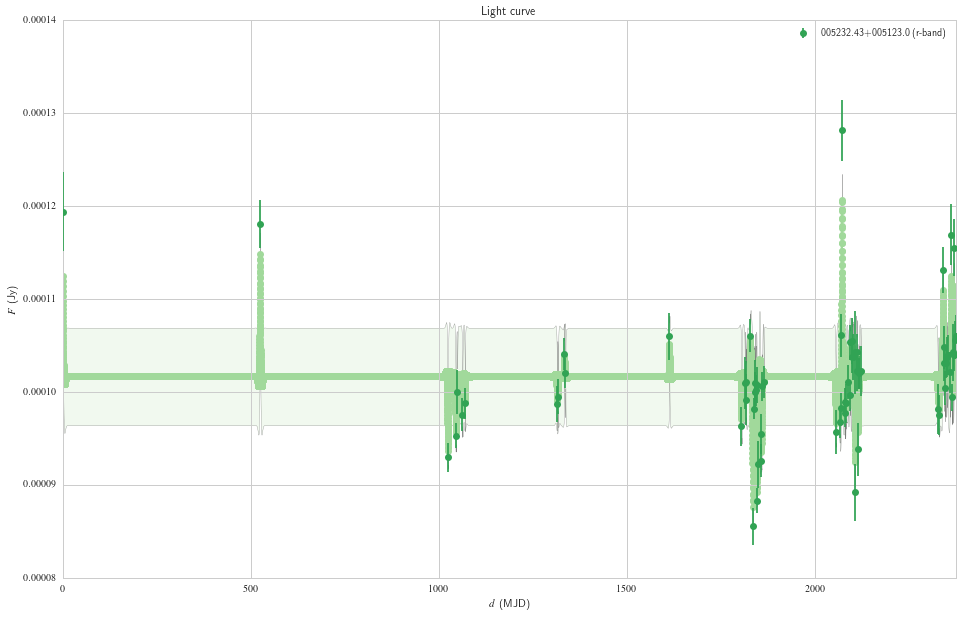

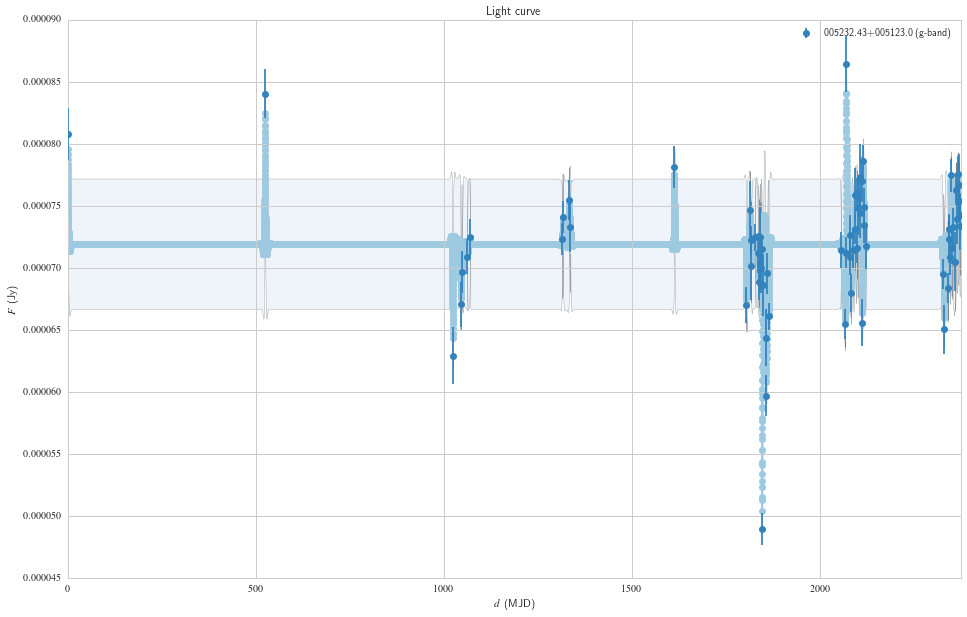

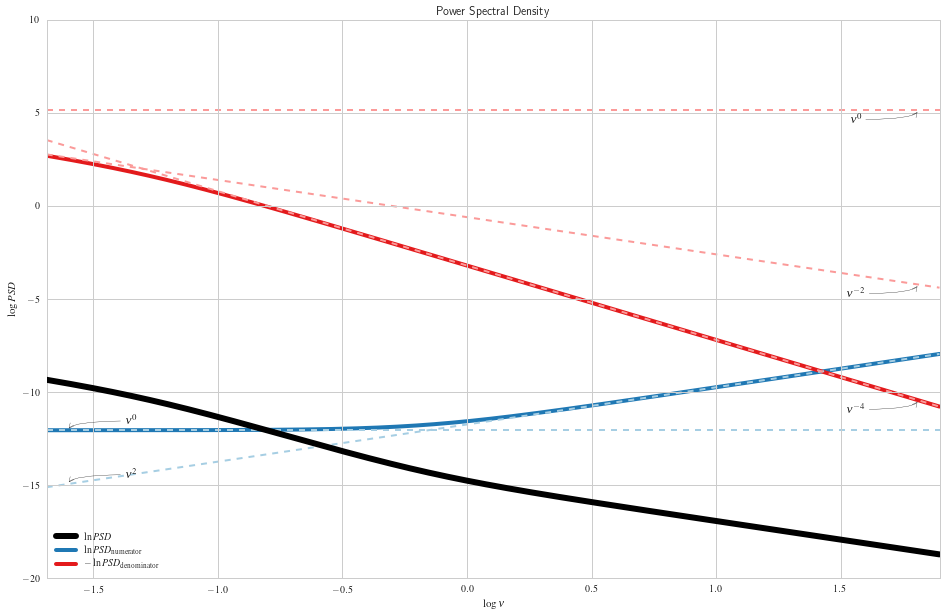

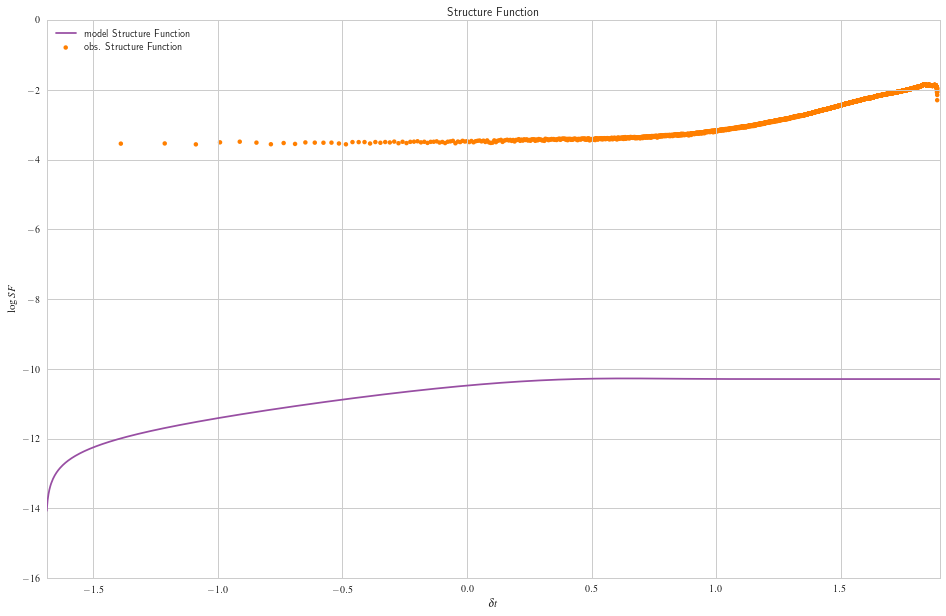

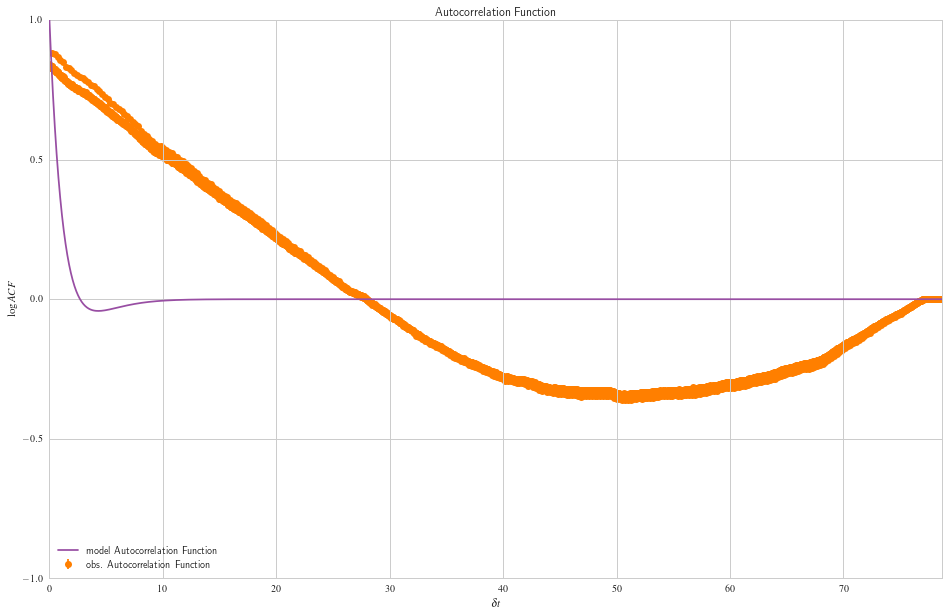

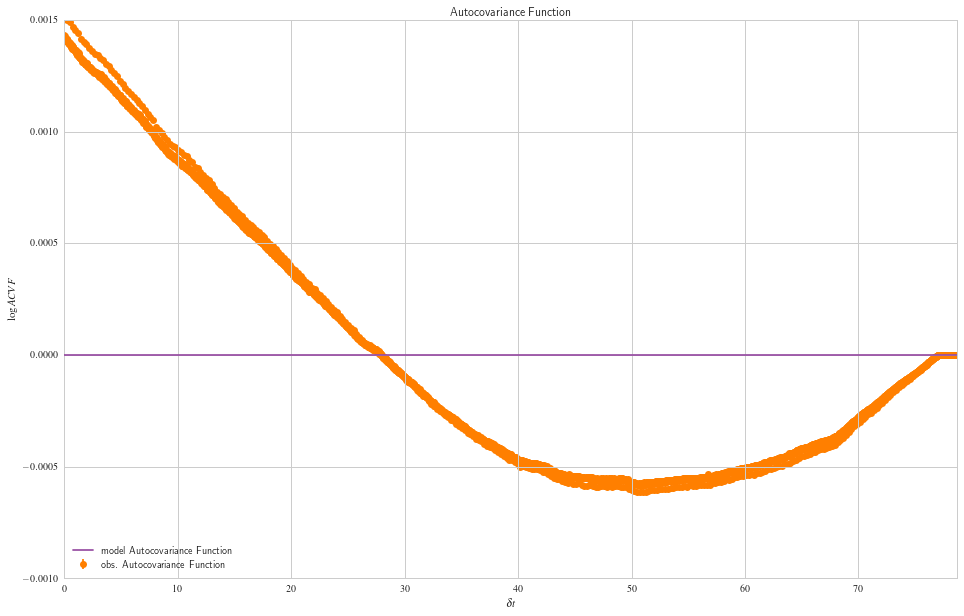

In [25]:
ntg.smooth(sdsslc_g)
sdsslc_g.plot()

#FUNCTIONS IN LIBCARMA.PY
PSDplot = nt.plotpsd(LC = LC)

a = nt.plotacvf(LC = LC)

b = nt.plotacf(LC = LC)

#c = nt.plotdacf(LC = LC)

d = nt.plotsf(LC = LC)
ntg.smooth(sdsslc_r)
sdsslc_r.plot(1)

In [19]:
ntk2 = carmaFit(LC,2)
ntevk2 = carmaFit(everestLC,2)

Starting libcarma fitting for p = 2 and q = 1...
libcarma took 49.268 s = 0.821 min = 0.014 hrs
C-ARMA(2,1) DIC: +nan
Starting libcarma fitting for p = 2 and q = 1...
libcarma took 48.078 s = 0.801 min = 0.013 hrs
C-ARMA(2,1) DIC: +nan


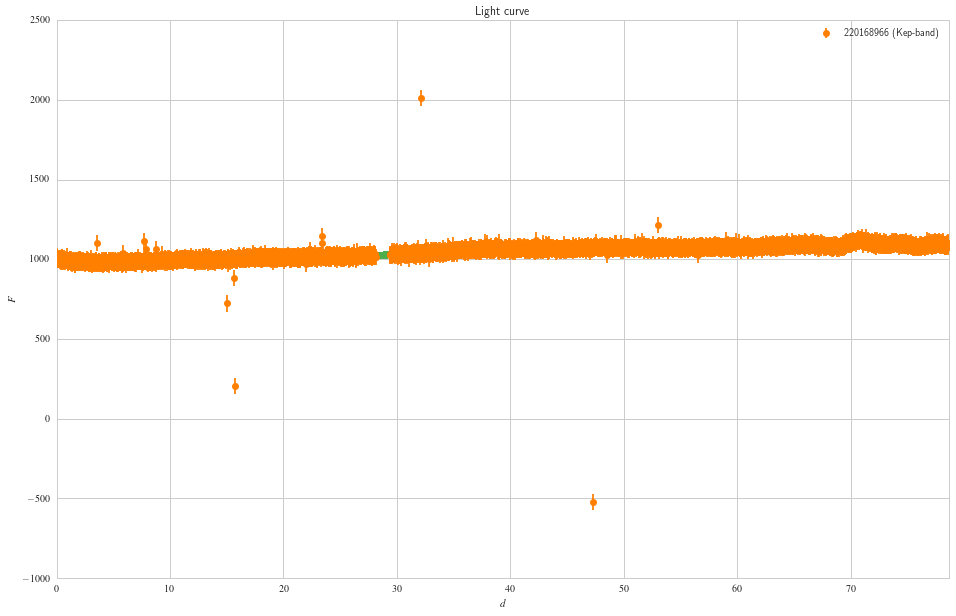

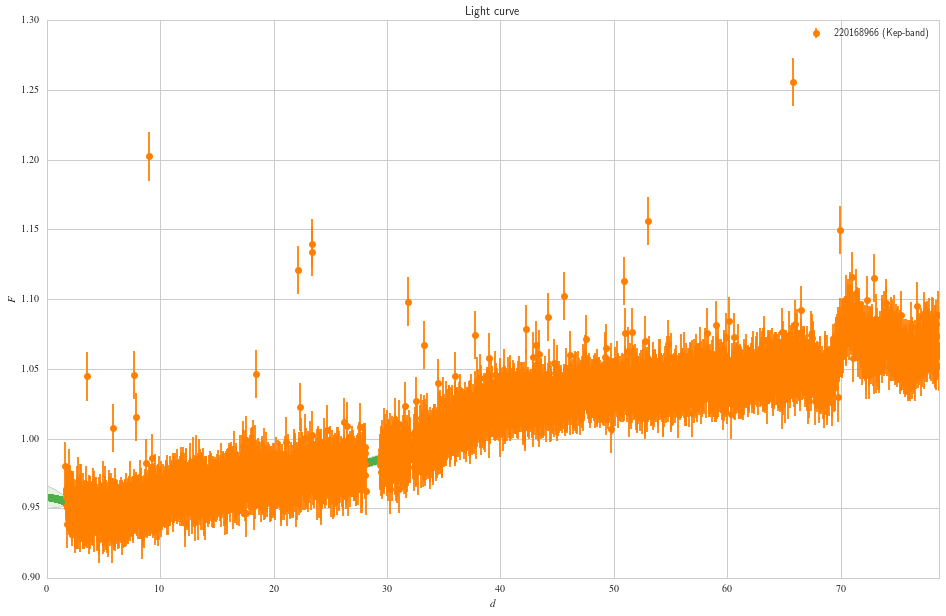

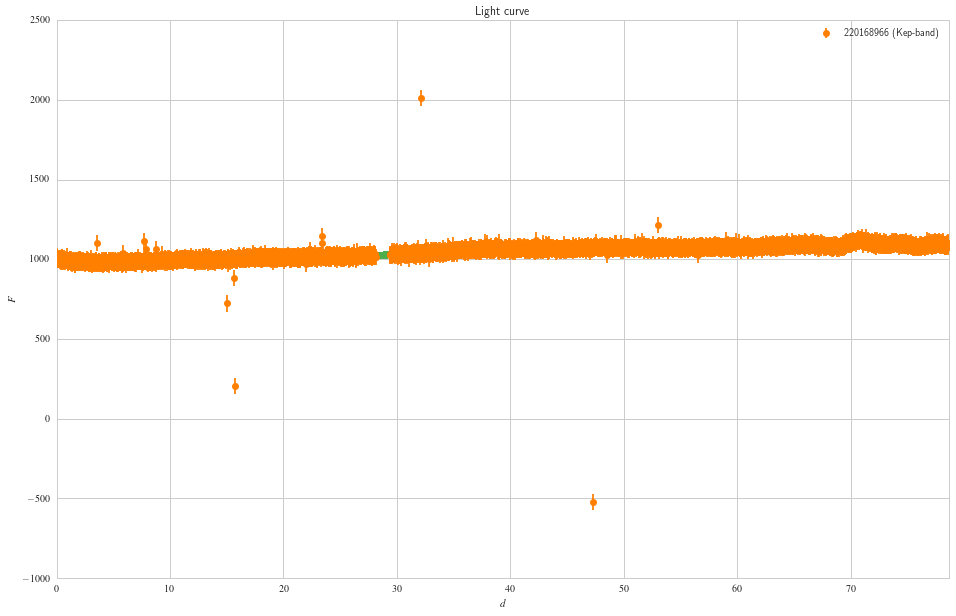

In [20]:
ntk2.smooth(LC)
LC.plot(3)
ntevk2.smooth(everestLC)
everestLC.plot(4)

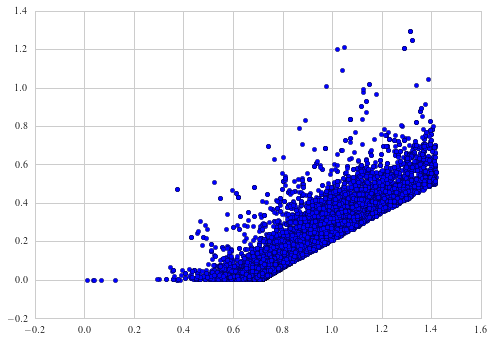

In [10]:

x1 = np.array(nt.Chain[0,:,:]).reshape((1,100*250))
x2 = np.array(nt.Chain[1,:,:]).reshape((1,100*250))
np.shape(x1)
plt.scatter(x1,x2)
#plt.xlim([0,30])
#plt.ylim([0,50])
#DHOparamsPlot(x1,x2)

In [11]:
g = sns.PairGrid(iris, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"],
                 hue = "species", diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter, edgecolor='white')
g.map_diag(sns.kdeplot, lw=3)

NameError: name 'iris' is not defined